# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).



In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import functools

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LinearRegression

from nltk.stem.snowball import SnowballStemmer

from textblob import TextBlob,Word
import eli5

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Scrapped Seek wbsite by using following codes

In [3]:
# source = requests.get("https://www.seek.com.au/data-scientist-jobs/in-All-Australia?page=1&salaryrange=40000-60000&salarytype=annual")
# soup1 = BeautifulSoup(source.content,'lxml')
# print(source.status_code)

# Total_df = {'job_title':[],'Job_post_date':[],'job_type':[],'city':[],'suburb':[],'salary':[],'salary_range':[],'industary':[],'jobDescription':[]}
# salaryrange=['40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000-160000','160000+']
# jobs  = ['data-scientist','data-insights-analyst','machine-learning-engineer']
    
# for sal in salaryrange:
#     for job in jobs:
#         url = "https://www.seek.com.au/"+job+"-jobs/in-All-Australia?page=1&salaryrange="+sal+"&salarytype=annual"
            
#         resq = requests.get(url)
#         soup = BeautifulSoup(resq.content,'lxml')
#         print('Print Status code : ' , source.status_code)
        
        
#         jobcount = int(soup.find_all('strong',{'data-automation': 'totalJobsCount'})[0].text)
#         #print('Total jobs advertised per page :' ,jobcount)
                
#         #if jobcount > 20:
#             tot_page = int(jobcount / 20) + 1
#         #else:
#             tot_page = 1
            
#         print('Total_pages_for srape :',tot_page)
        
#         for page in range(1,tot_page+1):
#             url_final = "https://www.seek.com.au/"+job+"-jobs/in-All-Australia?page="+str(page)+"&salaryrange="+sal+"&salarytype=annual"
#             print(url_final)
            
#             source = requests.get(url_final)
#             soup_url = BeautifulSoup(source.content,'lxml')
#             print('Print Status code : ' , source.status_code)
               
#             # total number of job advirtised on the page
            
#             # extracting job links  

#             all_links = soup_url.find_all('span', class_ = '_3FrNV7v _2IOW3OW HfVIlOd _2heRYaN E6m4BZb')

#             for link in all_links:
#                 token = link.span.h1.a['href']
#                 token = 'https://www.seek.com.au'+token
#                 print('Print href link:' , token)
    
#                 source = requests.get(token)
#                 soup_full_link = BeautifulSoup(source.content,'lxml')
#                 print(source.status_code)


#                     # job title
#                 job_title = soup_full_link.find_all('span',{'data-automation' : 'job-detail-title'})[0].text
#                 print('Job Title :' ,job_title)

        
#                     # job date

#                 Job_post_date = soup_full_link.find('dd',{'data-automation' : 'job-detail-date'}).text
#                 print('Job posted date' ,Job_post_date)

#                     # city

#                 city = soup_full_link.find_all('strong', class_='lwHBT6d')[1].text
#                 print('city:' ,city)

#                     # suburb

#                 suburb = soup_full_link.find_all('span', class_= 'eBOHjGN')[0].text
#                 print('suburb:',suburb)

#                     # salary detail

#                 salary = soup_full_link.find_all('span',class_='lwHBT6d')[2].text
#                 print('Total salary range:' ,salary)

#                     # indutary detail

#                 industary = soup_full_link.find_all('strong',class_='lwHBT6d')[2].text
#                 print('industary :', industary)

#                     # job type

#                 job_type = soup_full_link.find_all('span',class_='lwHBT6d')[3].text
#                 print('job_term :' ,job_type)

#                     # job description 

#                 jobDescription = soup_full_link.find('div',{'data-automation' : 'jobDescription'}).text
#                 print('jobDescription :' ,jobDescription)

#                 Total_df['job_title'].append(job_title)
#                 Total_df['Job_post_date'].append(Job_post_date)
#                 Total_df['city'].append(city)
#                 Total_df['suburb'].append(suburb)
#                 Total_df['salary'].append(salary)
#                 Total_df['salary_range'].append(sal)
#                 Total_df['industary'].append(industary)
#                 Total_df['job_type'].append(job_type)
#                 Total_df['jobDescription'].append(jobDescription)

In [4]:
# Lets a make a Dataframe of the scraped jobs

# Data_Scientists_jobs = pd.DataFrame(Total_df)
# Data_Scientists_jobs

In [5]:
# Now i am going to export the dataframe into my local device in csv format for further use.

# Data_Scientists_jobs.to_csv('local address/Data_Scientists_jobs.csv')

In [6]:
# Lets read the csv

webdata = pd.read_csv('./Data_Scientists_jobs.csv')

In [7]:
# Lets check the shape of the data

webdata.shape

(3623, 10)

In [8]:
# Lets also check teh info of the data

webdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3623 non-null   int64 
 1   job_title       3623 non-null   object
 2   Job_post_date   3623 non-null   object
 3   job_type        3623 non-null   object
 4   city            3623 non-null   object
 5   suburb          3623 non-null   object
 6   salary          3623 non-null   object
 7   salary_range    3623 non-null   object
 8   industary       3623 non-null   object
 9   jobDescription  3623 non-null   object
dtypes: int64(1), object(9)
memory usage: 283.2+ KB


In [9]:
# Lets see first 2 lines to see the data structure

webdata.head(2)

,Unnamed: 0,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription
0,0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...
1,1,"Junior Data Engineer - Robotics, Data Science!",31 Jul 2020,Full Time,Sydney,", CBD, Inner West & Eastern Suburbs",Salary + Superannuation,40000-60000,Information & Communication Technology,"\n\n\n\n\n\n\nJunior Data Engineer - Robotics,..."


In [10]:
# Lets create a new column with salary range with type INT

webdata['salary_range_int'] = webdata['salary_range'].str.split('-',expand=True)[0].str.strip('+').astype(int)

In [11]:
webdata.head(2)

,Unnamed: 0,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int
0,0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000
1,1,"Junior Data Engineer - Robotics, Data Science!",31 Jul 2020,Full Time,Sydney,", CBD, Inner West & Eastern Suburbs",Salary + Superannuation,40000-60000,Information & Communication Technology,"\n\n\n\n\n\n\nJunior Data Engineer - Robotics,...",40000


In [12]:
# Lets check and drop the duplicate/irrelevant rows

clean_data = webdata.sort_values('salary_range_int').drop(columns=
                                                          ['Unnamed: 0']).drop_duplicates(subset=
                                                            ['job_title','job_type','city','suburb',
                                                            'industary','jobDescription'])
clean_data.head(2)

,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int
0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000
63,.Net Developer - Graduate,28 Jul 2020,Share this role,ACT,", Engineering - Software",Full Time,40000-60000,Information & Communication Technology,\n\n\n\n\n\n\n.Net Developer - Graduate \nRXP ...,40000


In [13]:
# Reset the index

clean_data.reset_index(drop=True,inplace=True)

In [14]:
# checking for the index

clean_data.head(2)

,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int
0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000
1,.Net Developer - Graduate,28 Jul 2020,Share this role,ACT,", Engineering - Software",Full Time,40000-60000,Information & Communication Technology,\n\n\n\n\n\n\n.Net Developer - Graduate \nRXP ...,40000


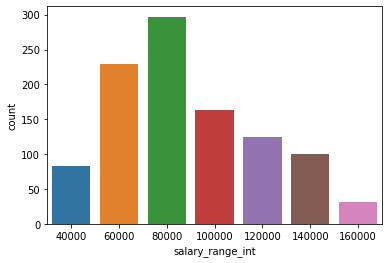

In [15]:
# lets create countplot to see the salary range

sns.countplot(clean_data.salary_range_int)

In [16]:
# lets create a function to find the digit from the total text and make a new column with name 'new_salary_min'

import re

def clean_salary(text):
    match = re.findall(r"(\d+,\d+)|(\d+[kK]*)",text)
    print(match)
    try:
        if(len(match[0][0])>0):
            return(match[0][0])
        else:
            return(match[0][1])
    except:
        try:
            return(match[0][1])
        except:
            return('no_salary')

clean_data['new_salary_min']= clean_data['salary'].apply(clean_salary)

[]
[]
[('60,000', ''), ('64,999', '')]
[('55,000', ''), ('59,999', '')]
[]
[]
[]
[]
[]
[('', '2021')]
[]
[]
[('60,000', ''), ('74,999', '')]
[]
[]
[('56,000', ''), ('59,999', '')]
[]
[]
[]
[]
[]
[]
[]
[('60,000', ''), ('64,999', '')]
[]
[]
[]
[]
[('50,000', ''), ('54,999', '')]
[]
[]
[]
[('', '50K'), ('', '80k')]
[]
[]
[]
[]
[]
[]
[]
[]
[('', '27'), ('', '05'), ('', '28'), ('', '15')]
[]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[]
[]
[]
[]
[]
[]
[]
[('60,000', ''), ('79,999', '')]
[]
[]
[]
[]
[('55,315', ''), ('59,503', '')]
[]
[('60,337', ''), ('66,617', '')]
[]
[]
[]
[('64,281', ''), ('', '91'), ('93,111', ''), ('', '61')]
[]
[('', '4'), ('63,044', ''), ('', '00'), ('68,529', ''), ('', '00')]
[]
[]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[]
[]
[]
[]
[('1,028', ''), ('', '14'), ('1,069', ''), ('', '96')]
[]
[('52,493', ''), ('67,410', '')]
[('52,493', ''), ('', '8211'), ('67,410', '')]
[('52,493'

In [19]:
# Now we find lots of Ks in the data so lets replace the  k/K with number '000'

clean_data['new_salary_min']=clean_data['new_salary_min'].apply(lambda x: str(x.replace('k','000')))
clean_data['new_salary_min']=clean_data['new_salary_min'].apply(lambda x: str(x.replace('K','000')))
clean_data['new_salary_min'].unique()


array(['no_salary', '60,000', '55,000', '2021', '56,000', '50,000',
       '50000', '27', '53,646', '55,315', '60,337', '64,281', '4',
       '1,028', '52,493', '38', '10', '100', '70,000', '80000', '65,000',
       '45', '80,000', '40', '76,955', '75,000', '75391', '100,000', '3',
       '80,137', '84,457', '75000', '69,401', '100000', '98,396',
       '80,669', '6', '125', '50', '95,000', '97,000', '93,347', '85,000',
       '90000', '409', '12', '88,286', '99,441', '86,851', '105',
       '90,000', '95000', '83,687', '100,184', '190000', '86,434',
       '98,000', '88,851', '110000', '86000', '98,298', '99000', '94,588',
       '15,4', '53', '93,326', '120000', '120,000', '55', '60', '125000',
       '114,834', '600', '150,000', '110,000', '500', '730', '17000',
       '125,444', '550', '400', '820', '800', '150000', '135,000',
       '130000', '145000', '900', '700', '140000', '180000', '170000',
       '76', '140,000', '144126', '180', '0', '950', '650', '180,000',
       '160000'

In [20]:
# we also need to make another new column with name 'new_salary_max'


def clean_salary(text):
    match = re.findall(r"(\d+,\d+)|(\d+[kK]*)",text)
    print(match)
    try:
        if(len(match[1][0])>0):
            return(match[1][0])
        else:
            return(match[1][0])
    except:
        try:
            return(match[1][0])
        except:
            return('no_salary')
clean_data['new_salary_max']=clean_data['salary'].apply(clean_salary)

[]
[]
[('60,000', ''), ('64,999', '')]
[('55,000', ''), ('59,999', '')]
[]
[]
[]
[]
[]
[('', '2021')]
[]
[]
[('60,000', ''), ('74,999', '')]
[]
[]
[('56,000', ''), ('59,999', '')]
[]
[]
[]
[]
[]
[]
[]
[('60,000', ''), ('64,999', '')]
[]
[]
[]
[]
[('50,000', ''), ('54,999', '')]
[]
[]
[]
[('', '50K'), ('', '80k')]
[]
[]
[]
[]
[]
[]
[]
[]
[('', '27'), ('', '05'), ('', '28'), ('', '15')]
[]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[]
[]
[]
[]
[]
[]
[]
[('60,000', ''), ('79,999', '')]
[]
[]
[]
[]
[('55,315', ''), ('59,503', '')]
[]
[('60,337', ''), ('66,617', '')]
[]
[]
[]
[('64,281', ''), ('', '91'), ('93,111', ''), ('', '61')]
[]
[('', '4'), ('63,044', ''), ('', '00'), ('68,529', ''), ('', '00')]
[]
[]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[('53,646', ''), ('', '87'), ('55,828', ''), ('', '98')]
[]
[]
[]
[]
[('1,028', ''), ('', '14'), ('1,069', ''), ('', '96')]
[]
[('52,493', ''), ('67,410', '')]
[('52,493', ''), ('', '8211'), ('67,410', '')]
[('52,493'

In [21]:
# Now its time to replace the K values from the Max column too.

clean_data['new_salary_max']=clean_data['new_salary_max'].apply(lambda x: str(x.replace('k','000')))
clean_data['new_salary_max']=clean_data['new_salary_max'].apply(lambda x: str(x.replace('K','000')))
clean_data['new_salary_max'].unique()

array(['no_salary', '64,999', '59,999', '74,999', '54,999', '', '79,999',
       '59,503', '66,617', '63,044', '67,410', '120,000', '80,000',
       '100,00', '85,000', '109,999', '93,259', '110,000', '71,896',
       '84,216', '115,233', '94,190', '119,052', '69,999', '79,495',
       '107,500', '107,193', '94,999', '94,588', '125,000', '117,627',
       '89,999', '139,445', '130,000', '139,999', '94,679', '129,999',
       '118,665', '115,000', '132,999', '95,253', '110,376', '103,113',
       '169,999', '150,000', '122,855', '140,000', '145,000', '160,000',
       '179,999', '180,000', '200,000', '220,000'], dtype=object)

In [22]:
# Lets also remove the  =comma's from both (Min and Max )columns(eg 60,000 to 60000)

clean_data['new_salary_min']=clean_data['new_salary_min'].apply(lambda x: str(x.replace(',','')))
clean_data['new_salary_max']=clean_data['new_salary_max'].apply(lambda x: str(x.replace(',','')))

In [23]:
clean_data.head(5)

,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int,new_salary_min,new_salary_max
0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000,no_salary,no_salary
1,.Net Developer - Graduate,28 Jul 2020,Share this role,ACT,", Engineering - Software",Full Time,40000-60000,Information & Communication Technology,\n\n\n\n\n\n\n.Net Developer - Graduate \nRXP ...,40000,no_salary,no_salary
2,Junior Business Analyst - C2 Angels,22 Jul 2020,Part Time,Melbourne,", CBD & Inner Suburbs","$60,000 - $64,999",40000-60000,Accounting,Minimum QualificationsMBA / Bachelor's degree ...,40000,60000,64999
3,Digital Marketing Executive,14 Jul 2020,Full Time,Melbourne,", CBD & Inner Suburbs","$55,000 - $59,999",40000-60000,Marketing & Communications,If you're looking for Marketing Management job...,40000,55000,59999
4,Operations Analyst,30 Jul 2020,Full Time,Adelaide,", Analysis & Reporting",Competitive salary + other benefits on offer,40000-60000,Sales,\n\n\n\n\n \n\nOperations Analyst \n\n\nProvid...,40000,no_salary,no_salary


In [24]:
# Now its time to fill the 'no_salary' string with number 0

clean_data['new_salary_min'] = pd.to_numeric(clean_data.new_salary_min, errors='coerce').fillna(0)
clean_data['new_salary_max'] = pd.to_numeric(clean_data.new_salary_max, errors='coerce').fillna(0)

In [25]:
clean_data.head(2)

,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int,new_salary_min,new_salary_max
0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000,0.0,0.0
1,.Net Developer - Graduate,28 Jul 2020,Share this role,ACT,", Engineering - Software",Full Time,40000-60000,Information & Communication Technology,\n\n\n\n\n\n\n.Net Developer - Graduate \nRXP ...,40000,0.0,0.0


In [26]:
# Lets create a final column with nae "Avg_Salary' by taking the mean of the min and max salary

clean_data['avg_salary'] = (clean_data['new_salary_min'] + clean_data['new_salary_max']/2)

In [27]:
clean_data.head(2)

,job_title,Job_post_date,job_type,city,suburb,salary,salary_range,industary,jobDescription,salary_range_int,new_salary_min,new_salary_max,avg_salary
0,Data Scientist,21 Jul 2020,Share this role,Melbourne,", CBD & Inner Suburbs",Full Time,40000-60000,Science & Technology,The Opportunity We are committed to the linkin...,40000,0.0,0.0,0.0
1,.Net Developer - Graduate,28 Jul 2020,Share this role,ACT,", Engineering - Software",Full Time,40000-60000,Information & Communication Technology,\n\n\n\n\n\n\n.Net Developer - Graduate \nRXP ...,40000,0.0,0.0,0.0


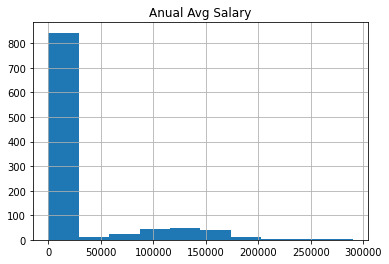

In [28]:
# Lets visualise the new Avg_salary column

clean_data['avg_salary'].hist(bins=10)
plt.title('Anual Avg Salary')
plt.show()

In [29]:
# Its time to work on the job description columns so Lets clean the job description column.

import string
import re
def clean_full_desc(text):
    # Turning text in to lowercase
    text = text.lower()
    # removing puntuation from text
    text = re.sub('[%s]' %re.escape(string.punctuation), '',text)
    # removing numbers that are in the middle of the text
    text = re.sub('\w*\d\w*', '', text)
    # taking out special caracters
    text = re.sub('\n', '', text)
    # taking out special caracters
    text = re.sub('\xa0', '', text)
    # taking out special caracters
    text = re.sub("'", '', text)
    # removing email addresses
    text = re.sub('([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)' , '',text)
    text = re.sub('(www)' , '',text)
    text = re.sub('(phd)' , '',text)
    # returnng the text clean
    # returnng the text clean
    return text

In [30]:
clean_data['jobDescription']=clean_data['jobDescription'].apply(clean_full_desc)

In [31]:
clean_data['jobDescription']

0       the opportunity we are committed to the linkin...
1       net developer  graduate rxp group is one of th...
2       minimum qualificationsmba  bachelors degree in...
3       if youre looking for marketing management jobs...
4        operations analyst providing high level funct...
                              ...                        
1024     opportunity cereal blueprints for a waterlimi...
1025     opportunity cereal blueprints for a waterlimi...
1026    auethosbccomactuarial data analyst  life insur...
1027    about usseer is developing technology to revol...
1028      x roles for large federal government agency ...
Name: jobDescription, Length: 1029, dtype: object

In [32]:
# Lets check and remove for the duplicate values again

clean_data.drop_duplicates(['job_title','job_type','city','suburb','industary','jobDescription'])
clean_data.shape

(1029, 13)

In [33]:
# After job description column, lets clean the job_title column
#Lead = eg..Lead React Developer,Strategic Projects Lead,Data Governance Lead

def titleclean(x):
    if 'lead' in x.lower() or 'senior' in x.lower():
        return 'Lead'
    elif 'manage' in x.lower():
        return 'Manager'
    elif 'scientist' in x.lower():
        return 'Scientist'
    elif 'developer' in x.lower():
        return 'Developer'
    elif 'engineer' in x.lower():
        return 'Engineer'
    elif 'analys' in x.lower():
        return 'Analyst'
    elif 'architect' in x.lower():
        return 'Architect'
    elif 'consult' in x.lower():
        return 'Consultant'
    else:
        return 'Generic'

In [34]:
#Lets check out the distribution of the titles now
clean_data['Title_new']=clean_data['job_title'].map(titleclean)
clean_data['Title_new'].value_counts()

Analyst       272
Lead          202
Engineer      191
Generic       183
Scientist      80
Manager        40
Developer      31
Consultant     20
Architect      10
Name: Title_new, dtype: int64

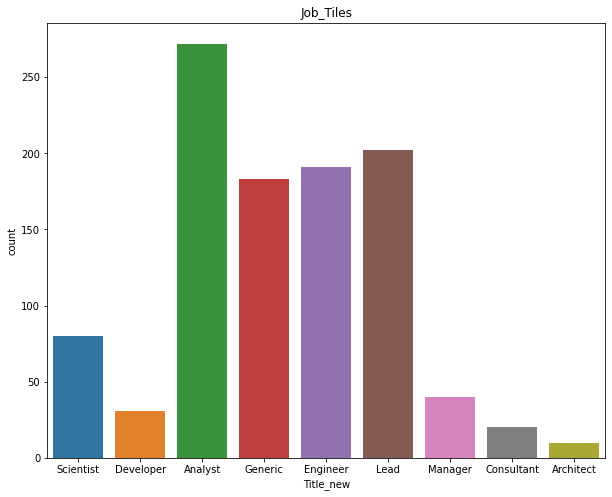

In [35]:
# Lets visualize the tiles with countplot

plt.figure(figsize=(10,8))
sns.countplot(clean_data.Title_new).set_title('Job_Tiles')
plt.show()

In [36]:
# Lets take a salary greater than 40000 only, it will help to remove outliers

salary = clean_data[(clean_data.avg_salary > 40000)]
salary.shape

(182, 14)

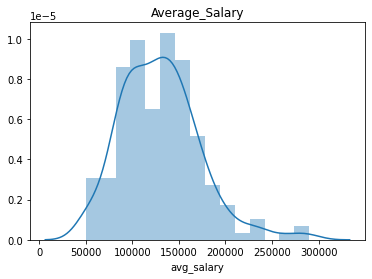

In [37]:
# Distplot to visualizde the salary >40000
sns.distplot(salary.avg_salary,kde=True,bins=15).set_title('Average_Salary')
plt.show()

#sns.distplot(clean_data.avg_salary)

## Modeling

In [108]:
# setting up target and predictors

X =salary.jobDescription
y =salary.avg_salary

In [109]:
X.shape , y.shape

((182,), (182,))

In [110]:
# Train Test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

X_train.shape , X_test.shape,y_train.shape,y_test.shape

((145,), (37,), (145,), (37,))

## Model with CountVectorizer and Linear Regression

In [111]:
# Making pipeline by using CountVectorizer and Linear Regression

from sklearn.pipeline import make_pipeline

model_lr = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',lowercase=False),LinearRegression())

cross_validatoin = cross_val_score(model_lr,X,y,cv=5)

print('cross_validatoin_score :',cross_validatoin)
print('cross_validatoin_mean :',cross_validatoin.mean())
print('cross_validatoin_std :',cross_validatoin.std())


cross_validatoin_score : [-7.33056755 -1.1691157  -1.56592341 -1.09210786 -1.0782308 ]
cross_validatoin_mean : -2.4471890631121327
cross_validatoin_std : 2.4481739285194


In [112]:
# Lets fit and Run the model 

model_lr.fit(X_train,y_train)

scores_train = model_lr.score(X_train,y_train)
scores_test = model_lr.score(X_test,y_test)

print(' Train score :' ,scores_train)
print(' Test score :' ,scores_test)

yhat = model_lr.predict(X_test)

 Train score : 0.9999999999995411
 Test score : -0.11720728035081796


In [43]:
# top 20 feature which help predict the salary with LinearRegression model

eli5.explain_weights(model_lr, top=20)

Weight?,Feature
+112809.336,<BIAS>
+52612.191,experience building
+37786.315,expertise data
+35913.691,software engineering
+34636.216,data engineering
+29578.474,machine learning
+29264.851,product management
+28545.216,recruitment process
+25051.983,management skills
+24813.351,ideal candidate


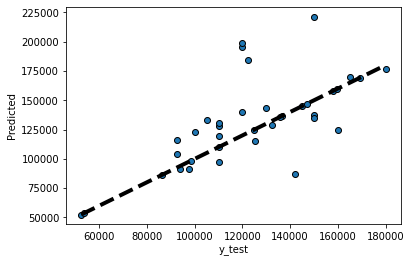

In [44]:
# Lets visualize the prediction

fig,ax = plt.subplots()
ax.scatter(y_test,yhat,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('y_test')
ax.set_ylabel('Predicted')
plt.show()

In [45]:
# Lets check the features

vect =CountVectorizer(ngram_range=(1,2),stop_words='english',
                      min_df=5,lowercase=False)
vect.fit_transform(X_train)
len(vect.get_feature_names())

1917

In [46]:
# Transforming our x_train data using our fit vect.
# And converting the result to a DataFrame.

X_train = pd.DataFrame(vect.transform(X_train).todense(),
                       columns=vect.get_feature_names())

In [47]:
X_train.shape

(145, 1917)

In [48]:
# Which words appear the most?
words = X_train.sum(axis=0)
words.sort_values(ascending = False).head(10)

data          1052
research       656
experience     563
work           547
role           393
business       357
skills         346
team           337
working        326
position       322
dtype: int64

## Model with CountVectorizer and RidgeCV

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [50]:
# Train -Test Split for RidgeCv

X_train_ridge,X_test_ridge,y_train_ridge,y_test_ridge = train_test_split(X,y,random_state=42,test_size=.30)

In [113]:
# As Linear model did not perfrom well so lets try RidgeCv

model_Ridge = make_pipeline(CountVectorizer(ngram_range=(2,2), binary =True, min_df=7, 
                                     stop_words='english',lowercase=False),RidgeCV())

cross_validatoin = cross_val_score(model_Ridge,X,y,cv=5)

print('cross_validatoin_score_Ridge :',cross_validatoin)
print('cross_validatoin_mean_Ridge :',cross_validatoin.mean())
print('cross_validatoin_std_Ridge :',cross_validatoin.std())

cross_validatoin_score_Ridge : [-4.07087665 -0.24025382 -0.43481975 -0.14004661 -1.27498215]
cross_validatoin_mean_Ridge : -1.2321957948275988
cross_validatoin_std_Ridge : 1.474617708212762


In [52]:
#Lets check the shape

X_train.shape, y_train.shape

((145, 1917), (145,))

In [53]:
# lets fit the model

model_Ridge.fit(X_train_ridge,y_train_ridge)

scores_train = model_Ridge.score(X_train_ridge,y_train_ridge)
scores_test = model_Ridge.score(X_test_ridge,y_test_ridge)

print(' Train scores :' ,scores_train)
print(' Test scores :' ,scores_test)

yhat = model_Ridge.predict(X_test)

 Train scores : 0.6197029902727887
 Test scores : 0.2926032158304597


In [54]:
# top 20 feature which help predict the salary with Ridge model

eli5.explain_weights(model_Ridge,top=20)

Weight?,Feature
+121992.066,<BIAS>
+20835.195,data engineering
+13677.191,data analytics
+13280.650,machine learning
+10288.189,engineering team
+9739.785,recruitment process
+9469.626,data science
+9425.768,development experience
+8047.414,confidential discussion
+7915.010,software engineering


## Model with CountVectorizer and LassoCV

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [56]:
# Train -Test Split for RidgeCv

X_train_lasso,X_test_lasso,y_train_lasso,y_test_lasso = train_test_split(X,y,test_size=.30)

In [57]:
X_train_lasso.shape,X_test_lasso.shape,y_train_lasso.shape,y_test_lasso.shape

((127,), (55,), (127,), (55,))

In [114]:
# Lets also try Lasso Model 

model_Lasso = make_pipeline(CountVectorizer(ngram_range=(2,2), binary =True, min_df=7, 
                                     stop_words='english',lowercase=False),LassoCV())

cross_validatoin = cross_val_score(model_Lasso,X,y,cv=5)

print('cross_validatoin_score :',cross_validatoin)
print('cross_validatoin_mean :',cross_validatoin.mean())
print('cross_validatoin_std :',cross_validatoin.std())

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20960207.59199524, tolerance: 19911729.484680172
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23055116.150115967, tolerance: 19911729.484680172
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20454561.76699114, tolerance: 19911729.484680172
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22521227.21715808, tolerance: 19381041.627292242
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21170841.764977455, tolerance: 19367472.568381038
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25453424.534796, tolerance: 19367472.568381038
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-pa

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73013885.91712165, tolerance: 19593917.045475863
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49145778.100138366, tolerance: 19593917.045475863
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55015990.55911124, tolerance: 19593917.045475863
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69337511.04692554, tolerance: 27635562.60436789
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100309309.38456368, tolerance: 27635562.60436789
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113200084.49929905, tolerance: 27635562.60436789
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-pa

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117716275.57504272, tolerance: 27483615.408928633
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33402382.987921238, tolerance: 27483615.408928633
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86704781.9420309, tolerance: 27483615.408928633
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26920004.222448826, tolerance: 25759039.39101325
  max_iter, tol, rng, random, positive)


KeyboardInterrupt: 

In [59]:
model_Lasso.fit(X_train_lasso,y_train_lasso)

scores_train = model_Lasso.score(X_train_lasso,y_train_lasso)
scores_test  = model_Lasso.score(X_test_lasso,y_test_lasso)

print(' Train scores :' ,scores_train)
print(' Test scores :' ,scores_test)

yhat = model_Lasso.predict(X_test_lasso)

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38472386.193003654, tolerance: 18840001.13765743
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99554238.1313653, tolerance: 18840001.13765743
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47252467.05322313, tolerance: 18840001.13765743
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-pack

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34283366.0332489, tolerance: 22392440.25088664
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40096486.51621848, tolerance: 22392440.25088664
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51422645.27573842, tolerance: 22392440.25088664
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packa

/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23854990.862754345, tolerance: 20210169.146696072
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34121923.82331443, tolerance: 20210169.146696072
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43838031.11635566, tolerance: 20210169.146696072
  max_iter, tol, rng, random, positive)
/Users/shamshersingh/opt/anaconda3/lib/python3.7/site-

 Train scores : 0.47129933781803923
 Test scores : 0.13843459410927583


In [60]:
# Top 20 feature which help to predict the salary 

eli5.explain_weights(model_Lasso,top=20)

Weight?,Feature
+120247.616,<BIAS>
+24232.115,data engineering
+24140.206,machine learning
+22273.771,relevant experience
+18290.300,big data
+10290.647,business requirements
+8760.244,product management
+8083.604,financial services
+7816.847,data science
+7349.295,development experience


## Model with CountVectorizer and RandomForest

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [62]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X,y,random_state=42, test_size=.30)

In [63]:
# Lets make RandomForest

model_rf = make_pipeline(CountVectorizer(ngram_range=(2,2), min_df=5, 
                                      stop_words='english',lowercase=True),RandomForestRegressor(max_depth=15,))

model_rf.fit(X_train_rf, y_train_rf)


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, ngram_range=(2, 2),
                                 stop_words='english')),
                ('randomforestregressor', RandomForestRegressor(max_depth=15))])

In [64]:
scores_train = model_rf.score(X_train_rf,y_train_rf)
scores_test  = model_rf.score(X_test_rf,y_test_rf)

print(' Train scores :' ,scores_train)
print(' Test scores :' ,scores_test)

yhat_rf = model_rf.predict(X_test_rf)

 Train scores : 0.8627023151460547
 Test scores : 0.2184804119357413


In [65]:
# top 20 feature which help predict the salary with RandomForestRegressior model

eli5.explain_weights(model_rf,top=15)

Weight,Feature
0.1405 ± 0.1959,data engineering
0.0447 ± 0.1294,data analytics
0.0426 ± 0.0950,development experience
0.0252 ± 0.0729,responsibilities include
0.0234 ± 0.0821,data science
0.0223 ± 0.0819,computer vision
0.0222 ± 0.0772,machine learning
0.0208 ± 0.0977,customer service
0.0192 ± 0.0992,provide evidence
0.0179 ± 0.0852,relevant experience


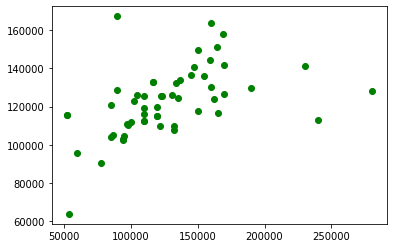

In [66]:
# Lets visualize the predicted value

plt.scatter(y_test_rf,yhat_rf,color='g')

## Question 2

## Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

In [67]:
clean_data.job_title.value_counts()

Data Engineer                                       50
Data Scientist                                      24
Data Analyst                                        20
Business Analyst                                    11
TAFE Teacher Mechanical - Fitting                   10
                                                    ..
Medical Laboratory Assistant                         1
Mid Level Consultant – Full Stack Developer          1
** Senior DevOps Engineer ** KUBERNETES / AWS **     1
Senior Scientist, Palmerston North, New Zealand      1
Junior Market Analyst                                1
Name: job_title, Length: 748, dtype: int64

In [68]:
# Lets create  a function to divide job title into Data Scientist and other jobs

def jobtitle(x):
    if 'scientist' in x.lower():
        return 'Data_Scientist'
#     elif 'analys' in x.lower():
#         return 'Analyst'
    else:
        return 'other_jobs'

In [69]:
# Lets create a new column for titles

clean_data['Title_new'] = clean_data['job_title'].map(jobtitle)
clean_data['Title_new'].value_counts()

other_jobs        931
Data_Scientist     98
Name: Title_new, dtype: int64

In [70]:
# Lets convert them into binary form

def foo(x):
    if x == 'Data_Scientist':
        return 1
    elif x == 'other_jobs':
        return 0
    else:
        return x

In [71]:
# Lets binarize the column

clean_data.Title_new.map(lambda x : foo(x))

0       1
1       0
2       0
3       0
4       0
       ..
1024    0
1025    0
1026    0
1027    0
1028    0
Name: Title_new, Length: 1029, dtype: int64

In [72]:
clean_data.Title_new.value_counts()

other_jobs        931
Data_Scientist     98
Name: Title_new, dtype: int64

In [73]:
# Setting up the target and predictors

X = clean_data.jobDescription
y = clean_data.Title_new

In [74]:
# Train Test split for Logistic Regression Model

X_train_logReg,X_test_logReg,y_train_logReg,y_test_logReg = train_test_split(X,y,random_state = 42,test_size=.30)

X_train_logReg.shape , X_test_logReg.shape,y_train_logReg.shape,y_test_logReg.shape

((720,), (309,), (720,), (309,))

In [75]:
# Checking the cross val scores

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


model_logReg = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',lowercase=False),LogisticRegression())

cross_validatoin = cross_val_score(model_logReg,X,y,cv=5)

print('cross_validatoin_score :',cross_validatoin)
print('cross_validatoin_mean :',cross_validatoin.mean())
print('cross_validatoin_std :',cross_validatoin.std())

cross_validatoin_score : [0.91262136 0.9223301  0.9223301  0.94174757 0.93170732]
cross_validatoin_mean : 0.9261472886573527
cross_validatoin_std : 0.009862813511563671


In [76]:
# Fitting the model and checking on scores

model_logReg.fit(X_train_logReg,y_train_logReg)


scores_train_logReg = model_logReg.score(X_train_logReg,y_train_logReg)
scores_test_logReg = model_logReg.score(X_test_logReg,y_test_logReg)

print(' Train score :' ,scores_train_logReg)
print(' Test score :' ,scores_test_logReg)

yhat_logReg = model_logReg.predict(X_test_logReg)

 Train score : 1.0
 Test score : 0.941747572815534


In [77]:
# Lets check the baseline score

baseline = y.value_counts(normalize=True)
baseline

other_jobs        0.904762
Data_Scientist    0.095238
Name: Title_new, dtype: float64

In [78]:
# Lets see the classification report for Logistic Regression Model

from sklearn import metrics

print(metrics.confusion_matrix(y_test_logReg, yhat_logReg))
print('-'*55, '\n')
print(metrics.classification_report(y_test_logReg, yhat_logReg))

[[  4  17]
 [  1 287]]
------------------------------------------------------- 

                precision    recall  f1-score   support

Data_Scientist       0.80      0.19      0.31        21
    other_jobs       0.94      1.00      0.97       288

      accuracy                           0.94       309
     macro avg       0.87      0.59      0.64       309
  weighted avg       0.93      0.94      0.92       309



In [79]:
# Lets visualize the top 15 features

eli5.explain_weights(model_logReg,top=15,)

Explanation(estimator="Pipeline(steps=[('countvectorizer',\n                 CountVectorizer(binary=True, lowercase=False, min_df=5,\n                                 ngram_range=(2, 2), stop_words='english')),\n                ('logisticregression', LogisticRegression())])", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='other_jobs', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=3.8911769656442696, std=None, value=None), FeatureWeight(feature='data engineer', weight=0.48173784677635245, std=None, value=None), FeatureWeight(feature='data analyst', weight=0.46187416323919783, std=None, value=None)], neg=[FeatureWeight(feature='data scientist', weight=-2.3157203920114022, std=None, value=None), FeatureWeight(feature='data science', weight=-0.8551925819122326, std=None, value=None), FeatureWeight(feature='report writing', weight=-0.678401650619804, std=None, value=None), FeatureWeight(feature='scientist join', weight=-0.569541969199623, std=None, value=None), FeatureWeight(feature='predictive modelling', weight=-0.5173035257727695, std=None, value=None), FeatureWeight(feature='bachelor science', weight=-0.5064655661247462, std=None, value=None), FeatureWeight(feature='exciting projects', weight=-0.47663580972339675, std=None, value=None), FeatureWeight(feature='research development', weight=-0.4726695227085866, std=None, value=None), FeatureWeight(feature='data using', weight=-0.4721096729883028, std=None, value=None), FeatureWeight(feature='sql python', weight=-0.4705838472994645, std=None, value=None), FeatureWeight(feature='laboratory staff', weight=-0.41803317399926115, std=None, value=None), FeatureWeight(feature='scientist work', weight=-0.4176560064688449, std=None, value=None)], pos_remaining=3513, neg_remaining=1704), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [80]:
# Train Test split for Random Forest model

X_train_rfc,X_test_rfc,y_train_rfc,y_test_rfc = train_test_split(X,y,test_size=.30)

X_train_rfc.shape , X_test_rfc.shape,y_train_rfc.shape,y_test_rfc.shape

((720,), (309,), (720,), (309,))

In [81]:
# Cross Validation with RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_rfc = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',
                                          lowercase=False),
                          RandomForestClassifier(n_estimators=100,max_depth=None,max_features='auto'))

cross_validatoin = cross_val_score(model_rfc,X,y,cv=5)

print('cross_validatoin_score :',cross_validatoin)
print('cross_validatoin_mean :',cross_validatoin.mean())
print('cross_validatoin_std :',cross_validatoin.std())


cross_validatoin_score : [0.91747573 0.91747573 0.91747573 0.9223301  0.92195122]
cross_validatoin_mean : 0.9193417002131186
cross_validatoin_std : 0.0022884781848020183


In [82]:
# Lets fit the model

model_rfc.fit(X_train_rfc,y_train_rfc)

scores_train_rfc = model_rfc.score(X_train_rfc,y_train_rfc)
scores_test_rfc = model_rfc.score(X_test_rfc,y_test_rfc)

print(' Train score :' ,scores_train_rfc)
print(' Test score :' ,scores_test_rfc)

yhat_rfc = model_rfc.predict(X_test_rfc)


 Train score : 1.0
 Test score : 0.9449838187702265


In [83]:
# Lets see the classification report for Logistic RandomForestClassifer Model

from sklearn import metrics

print(metrics.confusion_matrix(y_test_rfc, yhat_rfc))
print('-'*55, '\n')
print(metrics.classification_report(y_test_rfc, yhat_rfc))

[[  8  16]
 [  1 284]]
------------------------------------------------------- 

                precision    recall  f1-score   support

Data_Scientist       0.89      0.33      0.48        24
    other_jobs       0.95      1.00      0.97       285

      accuracy                           0.94       309
     macro avg       0.92      0.66      0.73       309
  weighted avg       0.94      0.94      0.93       309



In [84]:
# Top 15 feature with RandomForestClassifier

eli5.explain_weights(model_rfc,top=15)

Weight,Feature
0.0374 ± 0.1498,data scientist
0.0129 ± 0.0497,scientist work
0.0113 ± 0.0583,sensed data
0.0096 ± 0.0473,scientist join
0.0087 ± 0.0389,scientific technical
0.0067 ± 0.0458,sensing principles
0.0067 ± 0.0323,predictive models
0.0061 ± 0.0433,remotely sensed
0.0061 ± 0.0331,report writing
0.0057 ± 0.0445,workflow development


In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Train Test split for DecisionTreeClassifier

X = clean_data.jobDescription
y = clean_data.Title_new

X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X,y,test_size=.20)

X_train_dt.shape , X_test_dt.shape,y_train_dt.shape,y_test_dt.shape

((823,), (206,), (823,), (206,))

In [95]:
from sklearn import metrics

clf = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',
                                          lowercase=False),DecisionTreeClassifier(max_depth=10))

# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)

#Predict the response for test dataset
yhat_dt = clf.predict(X_test_dt)

print("Accuracy Train:",metrics.accuracy_score(y_train_dt, y_train_dt))
print("Accuracy Test:",metrics.accuracy_score(y_test_dt, yhat_dt))


Accuracy Train: 1.0
Accuracy Test: 0.9466019417475728


In [96]:
# Lets see the classification report for Logistic DecisionTree Model

from sklearn import metrics

print(metrics.confusion_matrix(y_test_dt, yhat_dt))
print('-'*55, '\n')
print(metrics.classification_report(y_test_dt, yhat_dt))

[[ 11   9]
 [  2 184]]
------------------------------------------------------- 

                precision    recall  f1-score   support

Data_Scientist       0.85      0.55      0.67        20
    other_jobs       0.95      0.99      0.97       186

      accuracy                           0.95       206
     macro avg       0.90      0.77      0.82       206
  weighted avg       0.94      0.95      0.94       206



In [97]:
eli5.explain_weights(clf)

Weight,Feature
0.4431,data scientist
0.0764,research scientist
0.0744,laboratory testing
0.0474,contaminated land
0.0468,advice training
0.0326,data analyst
0.0302,technical service
0.0262,work environment
0.0244,information position
0.0241,science software


# What features are important for distinguishing junior vs. senior positions?

In [98]:
# Lets create a function to divide job titles into senior and junior

def jobtitle(x):
    if 'senior' in x.lower():
        return 'Senor'
#     elif 'junior' in x.lower():
#         return 'Junior'
    else:
        return 'other_titles'

In [99]:
clean_data['senior_junior'] = clean_data['job_title'].map(jobtitle)
clean_data['senior_junior'].value_counts()

other_titles    873
Senor           156
Name: senior_junior, dtype: int64

In [100]:
# Setting up the target and Predictors

X = clean_data.jobDescription

y = clean_data['senior_junior']

In [101]:
# Train Test Split

X_train_sj,X_test_sj,y_train_sj,y_test_sj = train_test_split(X,y,test_size=.20)

X_train_sj.shape , X_test_sj.shape,y_train_sj.shape,y_test_sj.shape

((823,), (206,), (823,), (206,))

In [102]:
# Lets try with RandomForestClassifier 

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_sj = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',
                                          lowercase=False),
                          RandomForestClassifier(n_estimators=100,max_depth=None,max_features='auto'))

model_sj.fit(X_train_sj,y_train_sj)

scores_train_sj = model_sj.score(X_train_sj,y_train_sj)
scores_test_sj = model_sj.score(X_test_sj,y_test_sj)

print(' Train score :' ,scores_train_sj)
print(' Test score :' ,scores_test_sj)

yhat_sj = model_sj.predict(X_test_sj)


 Train score : 1.0
 Test score : 0.8592233009708737


In [103]:
# Lets check the baseline scores

baseline = y.value_counts(normalize=True)
baseline

other_titles    0.848397
Senor           0.151603
Name: senior_junior, dtype: float64

In [104]:
# Lets see the classification report

from sklearn import metrics

print(metrics.confusion_matrix(y_test_sj, yhat_sj))
print('-'*55, '\n')
print(metrics.classification_report(y_test_sj, yhat_sj))

[[  4  24]
 [  5 173]]
------------------------------------------------------- 

              precision    recall  f1-score   support

       Senor       0.44      0.14      0.22        28
other_titles       0.88      0.97      0.92       178

    accuracy                           0.86       206
   macro avg       0.66      0.56      0.57       206
weighted avg       0.82      0.86      0.83       206



In [105]:
# Lets see the feature helps to predict the Senior and junior
eli5.explain_weights(model_sj)

Weight,Feature
0.0240 ± 0.0734,senior data
0.0098 ± 0.0381,experienced senior
0.0082 ± 0.0280,opportunity senior
0.0075 ± 0.0260,senior software
0.0074 ± 0.0323,role senior
0.0074 ± 0.0272,web application
0.0059 ± 0.0222,diverse group
0.0043 ± 0.0247,exciting senior
0.0040 ± 0.0195,senior business
0.0032 ± 0.0205,criteria apply
